In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "C:/Users/Asus/Documents/Projects/Python/A data analysis resume projects/zomato.csv"
encoding = 'ISO-8859-1'

data = pd.read_csv(file_path, encoding=encoding)

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data = data.drop(['Country Code','Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude','Rating color'],axis=1)

In [6]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'City', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')

In [7]:
data.shape

(9551, 14)

In [8]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
City                    0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

# Data Cleaning

In [9]:
data["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

This dataset does not have any dirtiness so keep the dataset as it is.

In [10]:
data.rename(columns={"Aggregate rating": "rate"} ,inplace=True)

In [11]:
data.head()

,Restaurant ID,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,rate,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229


# Calculate avg rating for each restaurants

In [12]:
rating = pd.pivot_table(data, index='Restaurant Name', values='rate')
rating

,rate
Restaurant Name,
Let's Burrrp,0.0
#45,3.6
#Dilliwaala6,3.7
#InstaFreeze,0.0
#OFF Campus,3.7
...,...
t Lounge by Dilmah,3.6
tashas,4.1
wagamama,3.7


In [13]:
rating = rating.sort_values(['rate'], ascending=False)
rating[0:15]

,rate
Restaurant Name,
Caterspoint,4.9
Mazzaro's Italian Market,4.9
Sagar Gaire Fast Food,4.9
McGuire's Irish Pub & Brewery,4.9
Milse,4.9
Solita,4.9
Ooma,4.9
Pom Pom's Teahouse and Sandwicheria,4.9
Braseiro da Gíçvea,4.9


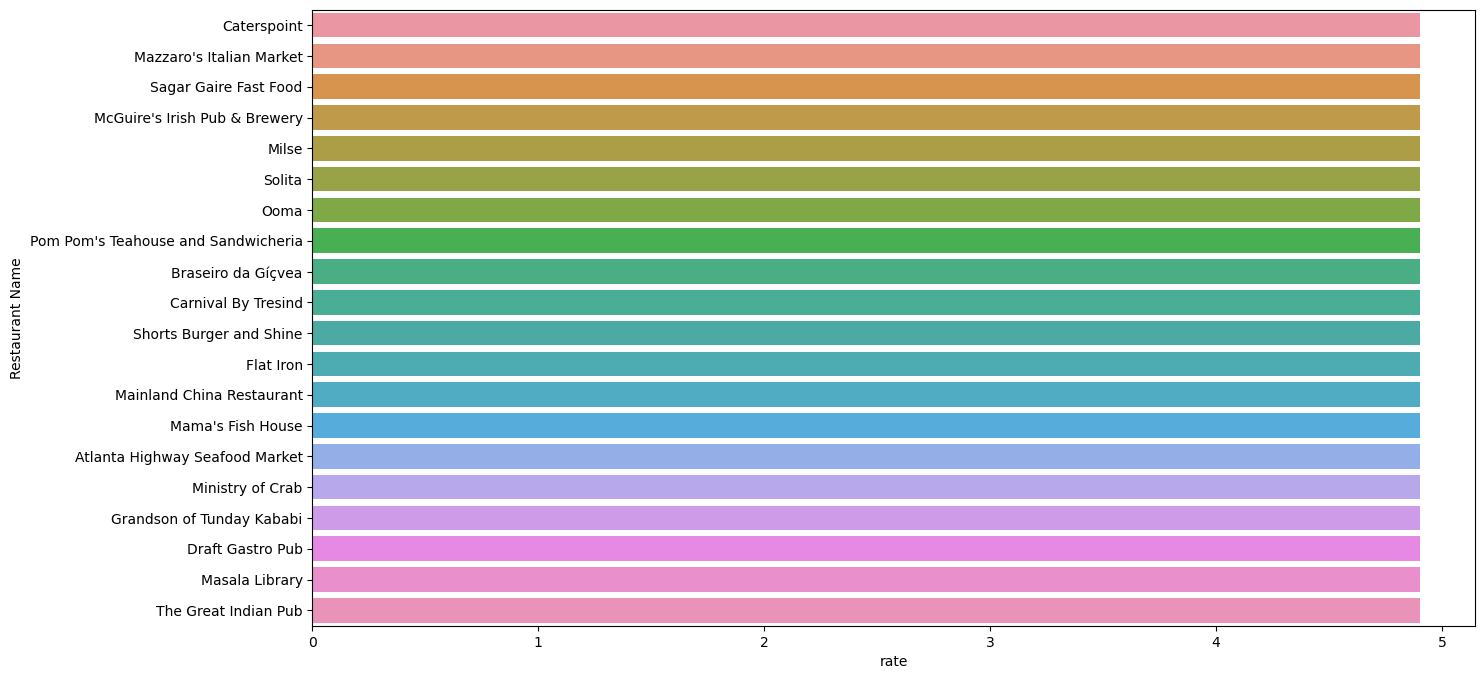

In [14]:
#barplot
plt.figure(figsize=(15,8))
sns.barplot(x=rating[0:20].rate, y=rating[0:20].index , orient="h")
plt.show()

Here mostly restaurants have rating of 4.9. Thats why these are aligned in the same way.

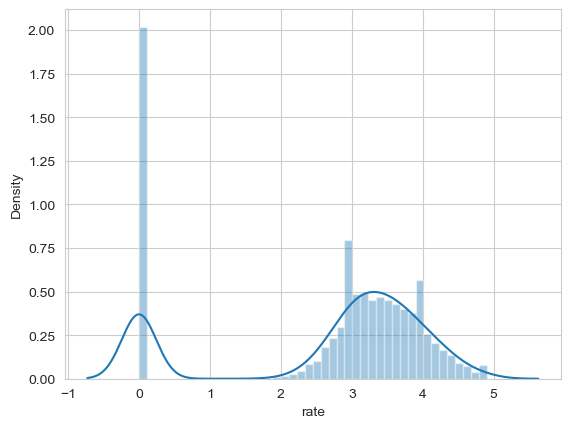

In [15]:
sns.set_style('whitegrid')
sns.distplot(data['rate'])
plt.show()

# Top restaurants

In [16]:
data.rename(columns= {"Restaurant Name" : "Name"}, inplace= True)

In [17]:
data.head()

,Restaurant ID,Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,rate,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270
3,6318506,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Excellent,229


In [18]:
data['Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Name, Length: 7446, dtype: int64

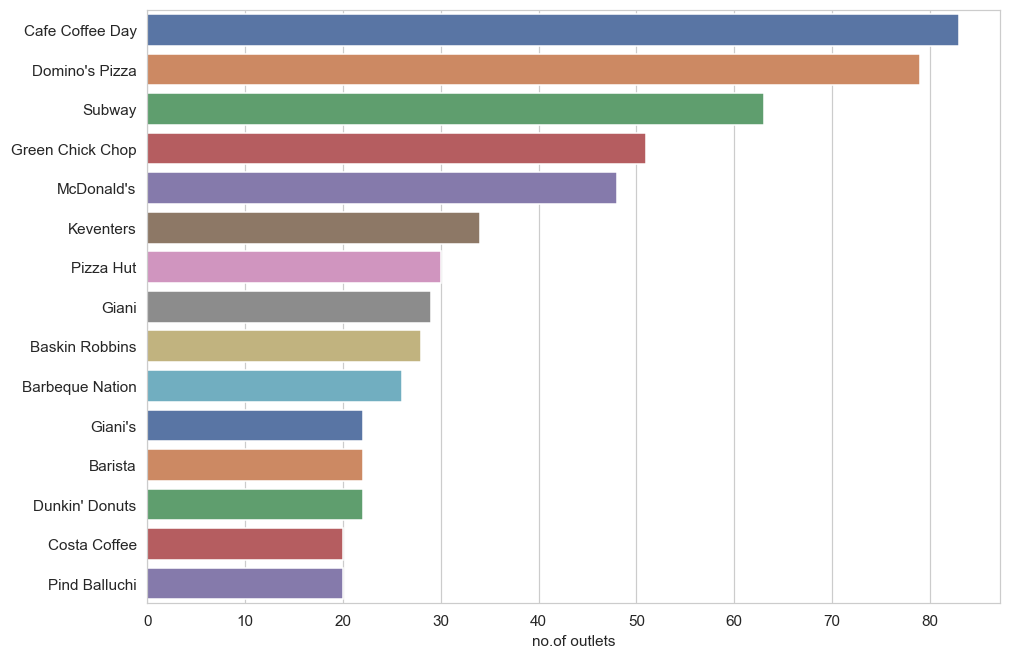

In [19]:
plt.figure(figsize=(10,7), dpi=110)
chains = data['Name'].value_counts()[0:15]
sns.barplot(x=chains,y=chains.index, palette="deep")
plt.xlabel("no.of outlets")
plt.show()

# How many restaurants allows online delivery and does not allows online delivery?

In [20]:
data["Has Online delivery"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data.rename(columns={"Has Online delivery": "online_delivery"}, inplace=True)

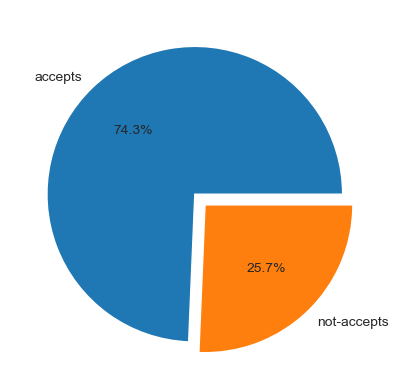

In [22]:
x = data.online_delivery.value_counts()
labels = ['accepts', 'not-accepts']
plt.pie(x,labels=labels,explode=[0.0,0.1], autopct='%1.1f%%')
plt.show()

# How many restaurants allows table bookings and does not allows table bookings?

In [23]:
data.rename(columns={"Has Table booking": "Table_bookings"}, inplace=True)

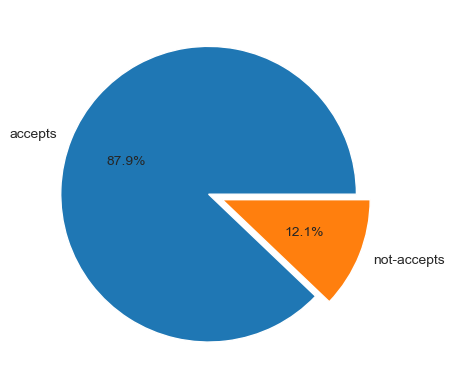

In [24]:
x = data.Table_bookings.value_counts()
labels = ['accepts', 'not-accepts']
plt.pie(x,labels=labels,explode=[0.0,0.1], autopct='%1.1f%%')
plt.show()

# Which restaurants have highest votings?

In [25]:
voting = data.groupby('Name')[['Votes']].mean()
voting

,Votes
Name,
Let's Burrrp,0.0
#45,209.0
#Dilliwaala6,124.0
#InstaFreeze,2.0
#OFF Campus,216.0
...,...
t Lounge by Dilmah,34.0
tashas,374.0
wagamama,131.0


In [26]:
voting['Votes'].describe()

count     7446.000000
mean       152.247584
std        401.467045
min          0.000000
25%          4.000000
50%         28.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64

In [27]:
high_vot = voting[voting['Votes']>5000]

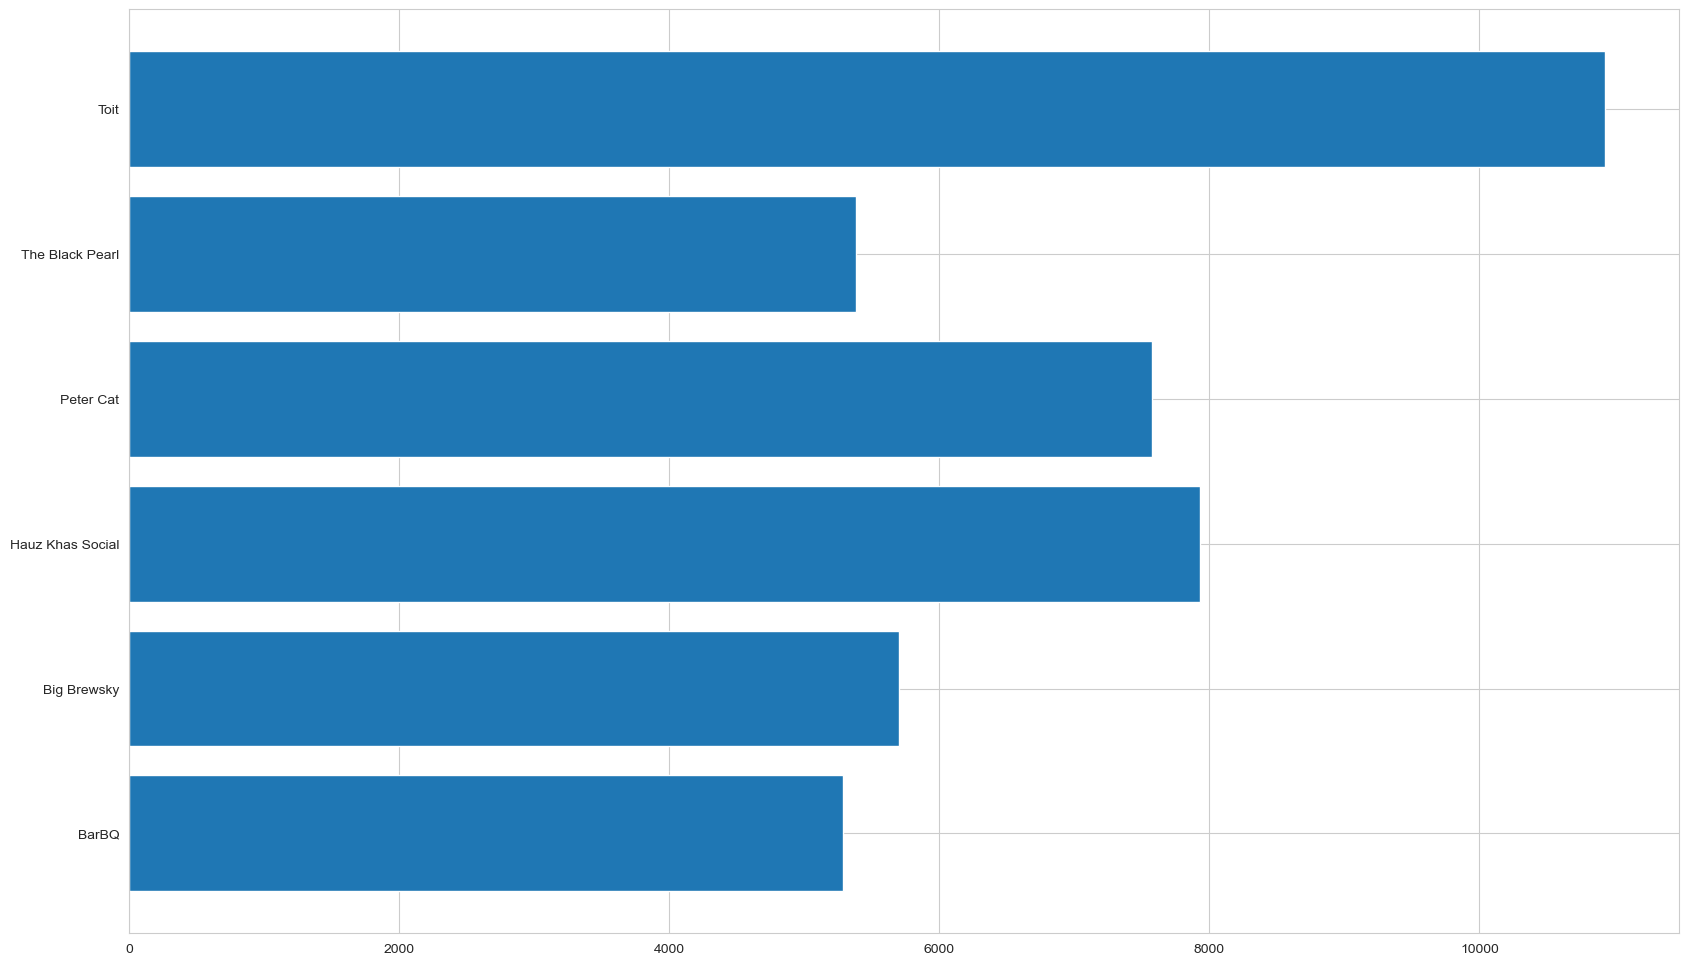

In [28]:
plt.figure(figsize=(20,12),dpi=100)
plt.barh(high_vot.index, high_vot['Votes'])
plt.show()

# Location in which we have highest number of restaurants

In [29]:
location = data[["City"]].value_counts()[0:20]
location

City        
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Jaipur            20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Mangalore         20
Manchester        20
Indore            20
Macon             20
Agra              20
dtype: int64

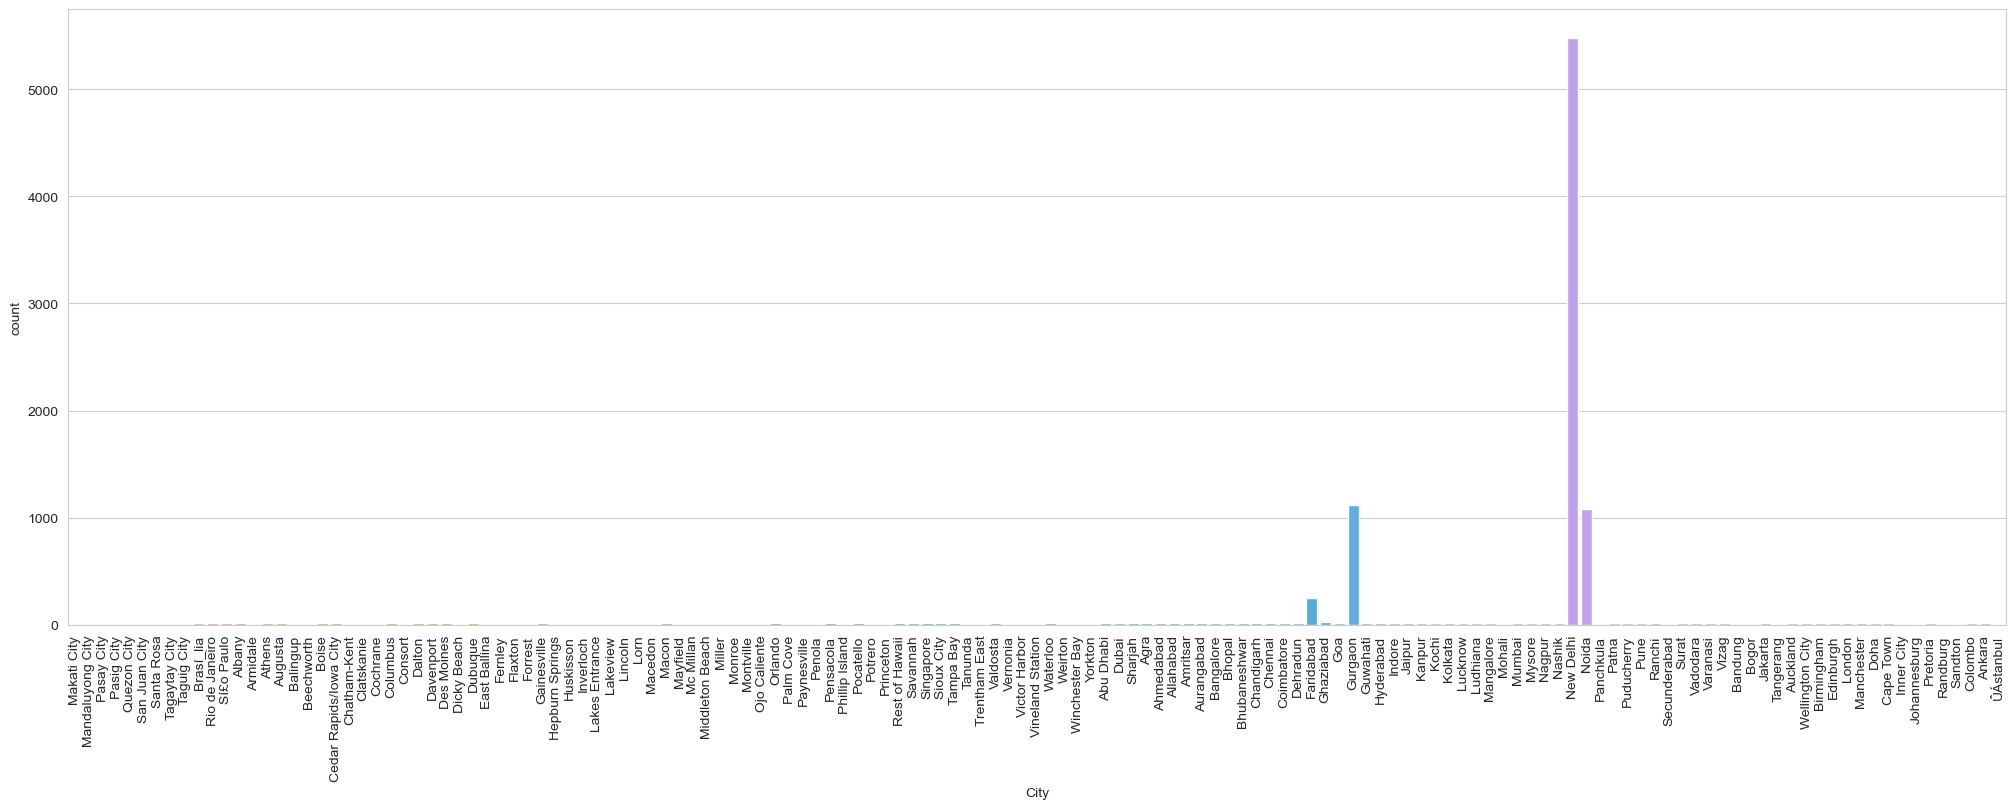

In [30]:
plt.figure(figsize=(25,8))
sns.countplot(x="City", data=data)
plt.xticks(rotation=90)
plt.show()

# Show only top 5 cities

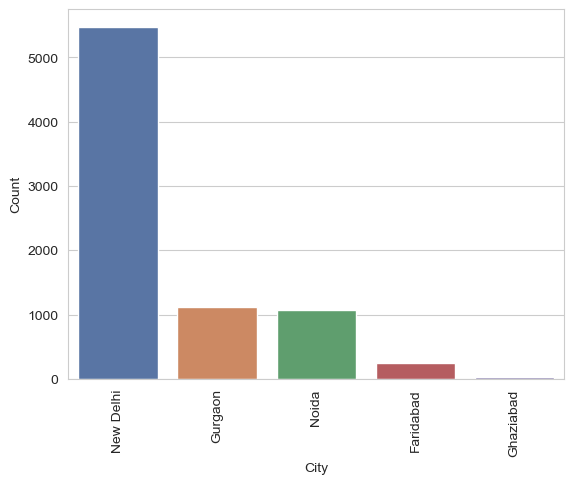

In [31]:
city_counts = data["City"].value_counts()

# Get the top 10 cities
top_5_cities = city_counts.head(5)

# Create a new DataFrame for plotting
top_cities_df = pd.DataFrame({"City": top_5_cities.index, "Count": top_5_cities.values})

# Create the countplot
sns.barplot(x="City", y="Count", data=top_cities_df, palette="deep")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Identify top Cuisines

In [32]:
data.head(2)

,Restaurant ID,Name,City,Cuisines,Average Cost for two,Currency,Table_bookings,online_delivery,Is delivering now,Switch to order menu,Price range,rate,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591


North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


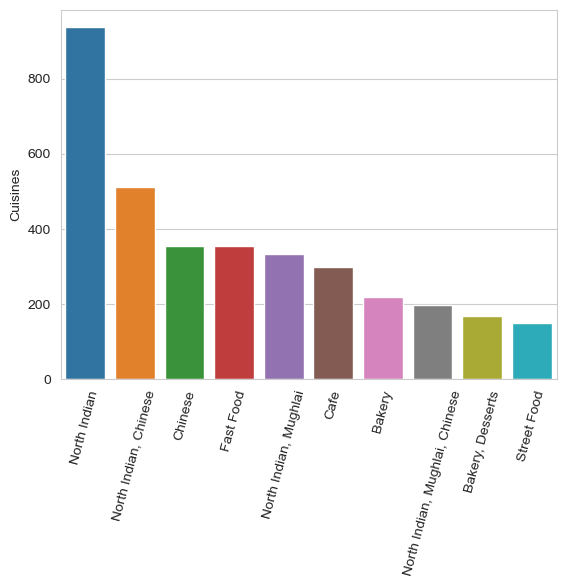

In [33]:
cusin = data.Cuisines.value_counts()[0:10]
print(cusin)
sns.barplot(x=cusin.index, y=cusin)
plt.xticks(rotation=75)
plt.show()

In [34]:
data.head(2)

,Restaurant ID,Name,City,Cuisines,Average Cost for two,Currency,Table_bookings,online_delivery,Is delivering now,Switch to order menu,Price range,rate,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591


In [35]:
data['Average Cost for two'].isna().sum()

0

In [36]:
data["Average Cost for two"]

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

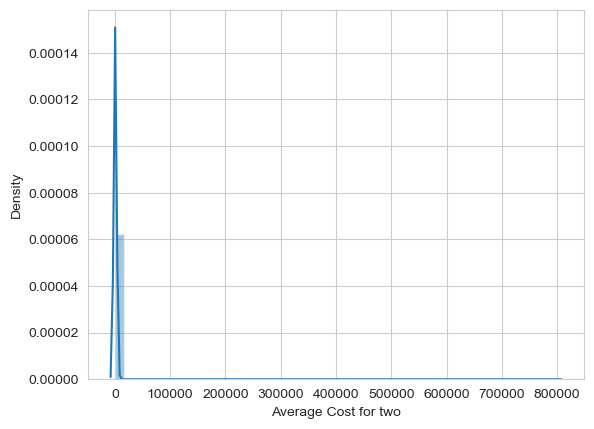

In [37]:

sns.distplot(data["Average Cost for two"])
plt.show()

In [38]:
data.head(2)

,Restaurant ID,Name,City,Cuisines,Average Cost for two,Currency,Table_bookings,online_delivery,Is delivering now,Switch to order menu,Price range,rate,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591


In [39]:
data["Rating text"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [40]:
data.rename(columns={"Rating text": "rate_text"},inplace = True)

In [ ]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.countplot(x="Name", hue="rate_text", data=data, palette="Set2")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()